In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import mmh3
import numpy as np
import random
import string
from bitarray import bitarray

<h1>Probabilistic Data Structures - Bloom Filter</h1>

<h2>Data Structure</h2>

<h4>Definition</h4>

<p align="justify">In computer science, a data structure is a data organization, management, and storage format that enables efficient access and modification. More precisely, a data structure is a collection of data values, the relationships among them, and the functions or operations that can be applied to the data<sup>1</sup>. A data structure is a particular way of organizing data in a computer so that it can be used effectively<sup>2</sup>.</p></br>

<h4>Usage</h4>

<p align="justify">Data structures serve as the basis for abstract data types (ADT). The ADT defines the logical form of the data type. The data structure implements the physical form of the data type. Different types of data structures are suited to different kinds of applications, and some are highly specialized to specific tasks. Usually, efficient data structures are key to designing efficient algorithms. Some formal design methods and programming languages emphasize data structures, rather than algorithms, as the key organizing factor in software design. Data structures can be used to organize the storage and retrieval of information stored in both main memory and secondary memory.</p>

<h4>Implementation</h4>

<p align="justify">Data structures are generally based on the ability of a computer to fetch and store data at any place in its memory, specified by a pointer-a bit string, representing a memory address, that can be itself stored in memory and manipulated by the program. Thus, the array and record data structures are based on computing the addresses of data items with arithmetic operations, while the linked data structures are based on storing addresses of data items within the structure itself.

The implementation of a data structure usually requires writing a set of procedures that create and manipulate instances of that structure. The efficiency of a data structure cannot be analyzed separately from those operations. This observation motivates the theoretical concept of an abstract data type, a data structure that is defined indirectly by the operations that may be performed on it, and the mathematical properties of those operations (including their space and time cost).</p>

<h4>Data Structure Types</h4>

<p align="justify">As data structures are used to store data in an organized form, and since data is the most crucial entity in computer science, the true worth of data structures is clear. No matter what problem are you solving, in one way or another you have to deal with data - whether it’s an employee’s salary, stock prices, a grocery list, or even a simple telephone directory.
Based on different scenarios, data needs to be stored in a specific format. We have a handful of data structures that cover our need to store data in different formats.

Here are some of the data structure types<sup>3</sup>:</p>
<div id="container" style="white-space:nowrap">
    <div id="image" style="display:inline;">
        <img src='images/data_structure_types.png' alt="Data Structure Types" width=600 height=400 align='right'/>
    </div>
    <div id="texts" style="display:inline; white-space:nowrap;"> 
        <ol align='left'>
            <li>Data types
                <ul>
                    <li>Primitive types</li>
                    <li>Composite types or non-primitive type</li>
                    <li>Abstract data types</li>
                </ul>
            </li>
            <li>Linear data structures
                <ul>
                    <li>Arrays</li>
                    <li>Lists</li>
                </ul>
            </li>
            <li>Trees (non-linear)
                <ul>
                    <li>Binary trees</li>
                    <li>B-trees</li>
                    <li>Heaps</li>
                    <li>Trees</li>
                    <li>Multi-way trees</li>
                    <li>Space-partitioning trees</li>
                    <li>Application-specific trees</li>
                </ul>
            </li>
            <li>Hash-based structures</li>
            <li>Graphs</li>
            <li>Other</li>
        </ol>
    </div>
</div>

<p align="justify">Hundreds of books have been written on why data structures and algorithms are important. Particularly impressive are Donald Knut's four volumes, entitled <a href="https://en.wikipedia.org/wiki/The_Art_of_Computer_Programming">"The Art of Computer Programming"</a>, in which data structures and algorithms are discussed in over 2,500 pages. One author has even titled a book answering the question "why data structures are so important". This is Nicklaus Wirth's book <a href="https://en.wikipedia.org/wiki/Algorithms_%2B_Data_Structures_%3D_Programs">"Algorithms + Data Structures = Programs"</a>, which looks again at data structures and fundamental algorithms in programming<sup>4</sup>.</p>

<h4>Algorhitms</h4>

<p align="justify">Speaking of data structures, we can not pass the algorithms. In mathematics and computer science, an algorithm is a finite sequence of well-defined, computer-implementable instructions, typically to solve a class of problems or to perform a computation. Algorithms are always unambiguous and are used as specifications for performing calculations, data processing, automated reasoning, and other tasks. Data structures and algorithms are the base of the programming.</p>

<p align="justify">We cannot talk about the efficiency of algorithms and data structures without using the term "algorithm complexity". The complexity of an algorithm is a rough estimate of the number of steps that the algorithm will take depending on the size of the input data. This is a rough estimate that is interested in the order of the number of steps, not the exact number. We'll not dig deeper on that, but if you are interested you can check more about <a href="https://en.wikipedia.org/wiki/Time_complexity">algorhitm complexity</a></p>

<h2>Probabilistic Structures</h2>

<p align='justify'>Probabilistic data structures is a common name for data structures
based mostly on different hashing techniques. Unlike regular (or
deterministic) data structures, they always provide approximated
answers but with reliable ways to estimate possible errors. Fortunately,
the potential losses and errors are fully compensated for by extremely
low memory requirements, constant query time, and scaling, the factors
that become essential in Big Data applications<sup>5</sup>.

Big data is characterized by three fundamental dimensions: Volume,
Velocity, and Variety, The Three V’s of Big Data. The Volume
expresses the amount of data, Velocity describes the speed at which data
is arriving and being processed, and Variety refers to the number of
types of data.
The data could come from anywhere, including social media, various
sensors, financial transactions, etc. IBM has stated
that people create
2.5 quintillion bytes of data every day, this number is growing
constantly and most of it cannot be stored and is usually wasted
without being processed. Today, it is not uncommon to process terabyte or petabyte-sized corporation's data and gigabit-rate streams.
On the other hand, nowadays every company wants to fully
understand the data it has, in order to find value and act on it. This led
to the rapid growth in the Big Data Software market. However,
the traditional technologies which include data structures and
algorithms, become ineffective when dealing with Big Data. Therefore,
many software practitioners, again and again, refer to computer science
for the most appropriate solutions and one option is to use probabilistic
data structures and algorithms.</p>

<p align='justify'>When processing large data sets, we often want to do some simple checks, such as number of unique items, most frequent items, and whether some items exist in the data set. The common approach is to use some kind of deterministic data structure like HashSet or Hashtable for such purposes. But when the data set we are dealing with becomes very large, such data structures are simply not feasible because the data is too big to fit in the memory. It becomes even more difficult for streaming applications which typically require data to be processed in one pass and perform incremental updates.

Probabilistic data structures are a group of data structures that are extremely useful for big data and streaming applications. Generally speaking, these data structures use hash functions to randomize and compactly represent a set of items. Collisions are ignored but errors can be well-controlled under certain threshold. The more number of hash function the more accurate result. Comparing with error-free approaches, these algorithms use much less memory and have constant query time. They usually support union and intersection operations and therefore can be easily parallelized<sup>6</sup>.</p>

<p align='justify'>By using this type of data structure, we can only safely assume that we have an approximately solution which may or may not be the exact answer but it's in the right direction. These data structures are proven to use either a fixed or sublinear memory and have constant execution time. The answers may not be exact and have some probability of error.
Any probablistic data structure will rely on some form of probability such as using randomness, hasing, and etc. to reach an approximate solution.
Some of the data structures are rather proven alternative approaches for a data structure but often times they are needed for these cases<sup>7</sup>:
  <ol>
    <li>Analzing / mining big data sets (more than what a deterministic data structure can handle).</li>
    <li>Statistical analysis.</li>
    <li>A stream of data that need an answer aftwares.</li>
  </ol>
</p>

<p align='justify'>In majority of the cases these data structures use hash functions to randomize the items as mentioned before. Because they ignore collisions they keep the size constant, but this is also a reason why they can't give you exact values. The advantages they bring<sup>8</sup>:
  <ol>
      <li>Use small amount of memory (you can control how much)</li>
      <li>Easily parallelizable (hashes are independent)</li>
      <li>Constant query time (not even amortized constant like in dictionary)</li>
  </ol>
  
Here are some of the Probabilistic Data Structure Types:
  <ol>
      <li>Membership querying (Bloom filter, Counting Bloom filter, Quotient filter, Cuckoo filter).</li>
      <li>Cardinality (Linear counting, probabilistic counting, LogLog, HyperLogLog, HyperLogLog++).</li>
      <li>Frequency (Majority algorithm, Frequent, Count Sketch, Count-Min Sketch).</li>
      <li>Rank (Random sampling, q-digest, t-digest).</li>
      <li>Similarity (LSH, MinHash, SimHash).</li>
  </ol>
</p>

<p>We will now look at one of the most commonly used probabilistic data structures - it is called Bloom filter.</p>

<h3>Bloom filter<sup>9</sup></h3>

<h6>Bloom filters test if an element is part of a set, without needing to store the entire set.</h6>

<p align='justify'>A Bloom filter is a space-efficient probabilistic data structure, conceived by Burton Howard Bloom in 1970, that is used to test whether an element is a member of a set. False positive matches are possible, but false negatives are not – in other words, a query returns either "possibly in set" or "definitely not in set". Elements can be added to the set, but not removed (though this can be addressed with the counting Bloom filter variant); the more items added, the larger the probability of false positives.

One simple way to think about Bloom filters is that they support insert and lookup in the same way the hash tables do, but using very little space, i.e., one byte per item or less. This is a significant saving when you have many items and each item takes up, say 8 bytes.</p>

<h4>Algorithm description</h4>

<img src='images/bloom_filter.png' alt="Bloom Filter" width=400 height=200 align='right'/>
<p align='justify'>An empty Bloom filter is a bit array of $m$ bits, all set to 0. There must also be $k$ different hash functions defined, each of which maps or hashes some set element to one of the $m$ array positions, generating a uniform random distribution. Typically, $k$ is a small constant which depends on the desired false error rate $\varepsilon$, while $m$ is proportional to $k$ and the number of elements to be added. 
    
To add an element, feed it to each of the $k$ hash functions to get $k$ array positions. Set the bits at all these positions to 1. To add/insert an item $x$ into the Bloom filter, we first compute the $k$ hash functions on $x$, and for each resulting hash, set the corresponding slot of A to 1 - see picture below<sup>10</sup>.
<img src='images/bloom_filter_insert.png' alt="Bloom Filter Insert" width=400 height=200 />    
Example of insert into Bloom filter. In this example, an initially empty Bloom filter has $m$=8, and $k$=2 (two hash functions). To insert an element $x$, we first compute the two hashes on $x$, the first one of which generates 1 and the second one generates 5. We proceed to set A[1] and A[5] to 1.  To insert $y$, we also compute the hashes and similarly, set positions A[4] and A[6] to 1.
    
To query for an element (test whether it is in the set), feed it to each of the $k$ hash functions to get $k$ array positions. If any of the bits at these positions is 0, the element is definitely not in the set; if it were, then all the bits would have been set to 1 when it was inserted. If all are 1, then either the element is in the set, or the bits have by chance been set to 1 during the insertion of other elements, resulting in a false positive. Similarly to insert, lookup computes $k$ hash functions on $x$, and the first time one of the corresponding slots of A equal to 0, the lookup reports the item as Not Present, otherwise it reports the item as Present.
<img src='images/bloom-filter_lookup.png' alt="Bloom Filter Lookup" width=400 height=200 />  
Example of a lookup on a Bloom filter. We take the resulting Bloom filter from picture above, where we inserted elements $x$ and $y$. To do a lookup on $x$, we compute the hashes (which are the same as in the case of an insert), and we return Found/Present, as both bits in corresponding locations equal 1. Then we do a lookup of an element $z$, which we never inserted, and its hashes are respectively 4 and 5, and the bits at locations A[4] and A[5] equal 1, thus we again return Found/Present. This is an example of a false positive, where two other items together set the bits of the third item to 1. An example of a negative (negative is always true), would be if we did a lookup on an element $w$, whose hashes are 2 and 5, (0 and 1), or 0 and 3 (0 and 0). If the Bloom filter reports an element as Not Found/Not Present, then we can be sure that this element was never inserted into a Bloom filter.
    
Asymptotically, the insert operation on the Bloom filter costs $O(k)$. Considering that the number of hash functions rarely goes above 12, this is a constant-time operation. The lookup might also need $O(k)$, in case the operation has to check all the bits, but most unsuccessful lookups will give up way before; usually on average, an unsuccessful lookup takes about 1-2 probes before giving up.
    
Removing an element from this simple Bloom filter is impossible because there is no way to tell which of the $k$ bits it maps to should be cleared. Although setting any one of those $k$ bits to zero suffices to remove the element, it would also remove any other elements that happen to map onto that bit. Since the simple algorithm provides no way to determine whether any other elements have been added that affect the bits for the element to be removed, clearing any of the bits would introduce the possibility of false negatives.

It is often the case that all the keys are available but are expensive to enumerate (for example, requiring many disk reads). When the false positive rate gets too high, the filter can be regenerated; this should be a relatively rare event.
</p>

<p align='justify'>For example, if we have inserted $\{x, y, z\}$ into the bloom filter, with $k=3$ hash functions like the picture above. Each of these three elements has three bits each set to 1 in the bit array. When we look up for $w$ in the set, because one of the bits is not set to 1, the bloom filter will tell us that it is not in the set. 
    
Bloom filter has the following properties:
    <ul>
        <li>False positive is possible when the queried positions are already set to 1. But false negative is impossible.</li>
        <li>Query time is $O(k)$.</li>
        <li>Union and intersection of bloom filters with same size and hash functions can be implemented with bitwise OR and AND operations.</li>
        <li>Cannot remove an element from the set.</li>
    </ul>
        
Bloom filter requires the following inputs:
    <ol>
        <li>$m$: size of the bit array</li>
        <li>$n$: estimated insertion</li>
        <li>$p$: false positive probability</li>
    </ol>
</p>

<h4>Space and time advantages</h4>

<p align='justify'>While risking false positives, Bloom filters have a substantial space advantage over other data structures for representing sets, such as self-balancing binary search trees, tries, hash tables, or simple arrays or linked lists of the entries. Most of these require storing at least the data items themselves, which can require anywhere from a small number of bits, for small integers, to an arbitrary number of bits, such as for strings (tries are an exception since they can share storage between elements with equal prefixes). However, Bloom filters do not store the data items at all, and a separate solution must be provided for the actual storage. Linked structures incur an additional linear space overhead for pointers. A Bloom filter with a 1% error and an optimal value of $k$, in contrast, requires only about 9.6 bits per element, regardless of the size of the elements. This advantage comes partly from its compactness, inherited from arrays, and partly from its probabilistic nature. The 1% false-positive rate can be reduced by a factor of ten by adding only about 4.8 bits per element.

To understand its space efficiency, it is instructive to compare the general Bloom filter with its special case when $k = 1$. If $k = 1$, then in order to keep the false positive rate sufficiently low, a small fraction of bits should be set, which means the array must be very large and contain long runs of zeros. The information content of the array relative to its size is low. The generalized Bloom filter ($k$ greater than 1) allows many more bits to be set while still maintaining a low false positive rate; if the parameters ($k$ and $m$) are chosen well, about half of the bits will be set, and these will be apparently random, minimizing redundancy and maximizing information content.
    
Let's detail a little bit on the space-efficiency. If you want to store a long list of items in a set, you could do in various ways. You could store that in a hashmap and then check existence in the hashmap which would allow you to insert and query very efficiently. However, since you will be storing the items as they are, it will not be very space efficient.

If we want to also be space efficient, we could hash the items before putting into a set. We could use bit arrays to store hash of the items. Let's also allow hash collision in the bit array. That is pretty much how Bloom Filters work, they are under the hood bit arrays which allow hash collisions; that produces false positives. Hash collisions exist in the Bloom Filters by design. Otherwise, they would not be compact. Whenever a list or set is used, and space efficiency is important and significant, Bloom filter should be considered<sup>11</sup>.
    
<b><i>Bloom filters are deterministic.</i></b> If we are using the same size and same number of hash functions as well as the hash function, bloom filter is deterministic on which items it gives positive response and which items it gives negative response. For an item $x$, if it gives it is probably in to that particular item, it will give the same response as 5 minutes later, 1 hour later, 1 day later and 1 week later. It was "probabilistic" so the response of the bloom filter should be somehow random, right? Not really. It is probabilistic in the sense that you cannot know which item it will say it is probably in. Otherwise, when it says that it is probably in, it keeps saying the same thing.
</p>

<h4>Controlling accuracy with memory</h4>

<p align='justify'>The more memory you give a bloom filter, the more accurate it will become. Why’s that? Simple: the more memory it has to store data in, the more information it can store, and the more accurate it can be. 
But, of course, we use a Bloom filter to save memory, so you need to find a balance between memory usage and the number of false positives that are acceptable.
Given these facts, you may already get a feeling for when to use a Bloom filter. In general terms, you use them to reduce the load on a system by reducing expense lookups in some data tables at a moderate memory expense. This data table can be anything. Some examples:
<ul>
    <li>A database</li>
    <li>A filesystem</li>
    <li>Some kind of key-value storage</li>
</ul>
</p>

<h4>Probability of false positives</h4>

<p align='justify'>While Bloom Filters can say "definitely not in" with confidence, they will also say possibly in for some number of items. Depending on the application, this could be a huge downside or it could be relatively okay. If it is okay to introduce false positives every now and then, you should definitely consider using Bloom Filters for membership existence for set operations.
Also note that if you are decreasing the false positive rate arbitrarily, you would increase the number of hash functions which would add latency to both insertion and membership existence. One more thing in this section is that, if the hash functions are independent each other and distribute the input space pretty uniformly, then the theoretic false positive rate can be satisfied. Otherwise, the false positive rate of the bloom filter will be worse than the theoretic false positive rate as hash functions correlate each other and hash collisions would occur more often than desired. When using a Bloom filter, we should consider the potential effects of false positives.
    
Assume that a hash function selects each array position with equal probability. If $m$ is the number of bits in the array, the probability that a certain bit is not set to 1 by a certain hash function during the insertion of an element is

$${\displaystyle 1-{\frac {1}{m}}}$$
    
If $k$ is the number of hash functions and each has no significant correlation between each other, then the probability that the bit is not set to 1 by any of the hash functions is

$${\displaystyle \left(1-{\frac {1}{m}}\right)^{k}}$$
    
We can use the well-known identity for $e−1$

$${\displaystyle \lim _{m\to \infty }\left(1-{\frac {1}{m}}\right)^{m}={\frac {1}{e}}}$$
to conclude that, for large $m$,

$${\displaystyle \left(1-{\frac {1}{m}}\right)^{k}=\left(\left(1-{\frac {1}{m}}\right)^{m}\right)^{\frac {k}{m}}\approx e^{-\frac {k}{m}}}$$
    
If we have inserted $n$ elements, the probability that a certain bit is still 0 is

$${\displaystyle \left(1-{\frac {1}{m}}\right)^{kn}\approx e^{-\frac {kn}{m}}}$$
the probability that it is 1 is therefore

$${\displaystyle 1-\left(1-{\frac {1}{m}}\right)^{kn}\approx 1-e^{-\frac {kn}{m}}}$$
    
Now test membership of an element that is not in the set. Each of the $k$ array positions computed by the hash functions is 1 with a probability as above. The probability of all of them being 1, which would cause the algorithm to erroneously claim that the element is in the set, is often given as

$${\displaystyle \varepsilon =\left(1-\left[1-{\frac {1}{m}}\right]^{kn}\right)^{k}\approx \left(1-e^{-\frac {kn}{m}}\right)^{k}}$$
    
This is not strictly correct as it assumes independence for the probabilities of each bit being set. However, assuming it is a close approximation we have that the probability of false positives decreases as $m$ (the number of bits in the array) increases, and increases as $n$ (the number of inserted elements) increases.

The true probability of a false positive, without assuming independence, is

$${\displaystyle {\frac {1}{m^{k(n+1)}}}\sum _{i=1}^{m}i^{k}i!{m \choose i}\left\{{kn \atop i}\right\}}$$
where the {braces} denote Stirling numbers of the second kind.

An alternative analysis arriving at the same approximation without the assumption of independence is given by Mitzenmacher and Upfal. After all $n$ items have been added to the Bloom filter, let $q$ be the fraction of the $m$ bits that are set to 0. (That is, the number of bits still set to 0 is $qm$.) Then, when testing membership of an element not in the set, for the array position given by any of the $k$ hash functions, the probability that the bit is found set to 1 is ${\displaystyle 1-q}$. So the probability that all $k$ hash functions find their bit set to 1 is ${\displaystyle (1-q)^{k}}$. Further, the expected value of $q$ is the probability that a given array position is left untouched by each of the $k$ hash functions for each of the $n$ items, which is (as above)

$${\displaystyle E[q]=\left(1-{\frac {1}{m}}\right)^{kn}}$$
    
It is possible to prove, without the independence assumption, that $q$ is very strongly concentrated around its expected value. In particular, from the Azuma–Hoeffding inequality, they prove that

$${\displaystyle \Pr(\left|q-E[q]\right|\geq {\frac {\lambda }{m})}\leq 2\exp \left( \frac {-2\lambda ^2}{kn} \right) }$$
    
Because of this, we can say that the exact probability of false positives is

$${\displaystyle \sum _{t}\Pr(q=t)(1-t)^{k}\approx (1-E[q])^{k}=\left(1-\left[1-{\frac {1}{m}}\right]^{kn}\right)^{k}\approx \left(1-e^{-\frac {kn}{m}}\right)^{k}}$$
as before.
</p>

<h4>Optimal number of hash functions</h4>

<p align='justify'>The optimum number of hash functions $k$ can be determined using the formula: $${\displaystyle k={\frac {m}{n}}\ln 2}$$
Given false positive probability $p$ and the estimated number of insertions $n$, the length of the bit array can be calculated as:$${\displaystyle m=-{\frac {n \ln p}{(\ln 2)^{2}}}}$$</p>

<p align='justify'>The hash functions used for bloom filter should generally be faster than cryptographic hash algorithms with good distribution and collision resistance. Commonly used hash functions for bloom filter include Murmur hash, fnv series of hashes and Jenkins hashes. Murmur hash is the fastest among them. MurmurHash3 is used by Google Guava library's bloom filter implementation.</p>

<h4>The sieve analogy<sup>12</sup></h4>

<p align='justify'>We can compare Bloom filters with a sieve, specially formed to only let through certain elements:
    <ul>
        <li>The known elements will fit the holes in the sieve and fall through.</li>
        <li>Even though they’ve never been seen before, some elements will fit the holes in the sieve too and fall through. These are our false positives.</li>
        <li>Other elements, never seen before, won’t fall through: the negatives.</li>
    </ul>
</p>

<h4>Disadvantages</h4>

<p align='justify'><b><i>The size of the Bloom Filters</i></b> need to be known a priori based on the number of items that you are going to insert. This is not so great if you do not know or cannot approximate the number of items. You could put an arbitrarily large size, but that would be a waste in terms of space which we are trying to optimize in the very first place and the reason why we adopt to choose Bloom Filter. This could be fixed to create a bloom filter dynamic to the list of items that you want to fit, but depending on the application, this may not be always possible. There is a variant called Scalable Bloom Filter which dynamically adjusts its size for different number of items. This could mitigate some of its shortcomings.

<b><i>Constructing and Membership Existence in Bloom Filter</i></b>
 
While using the Bloom Filters, you not only accept false positive rates, but also you are willing to have a little bit overhead in terms of speed. Comparing to an hashmap, there is definitely an overhead in terms of hashing the items as well as constructing the bloom filter.

<b><i>Cannot give the items that you inserted</i></b>
 
Bloom Filter cannot produce a list of items that are inserted, you could only check if an item is in it, but never get the full item list because of hash collisions and hash functions. This is due to arguably the most significant advantage over other data structures; its space efficiency which comes with this disadvantage.

<b><i>Removing an element</i></b>
 
Removing an element from the Bloom Filter is not possible, you cannot undo an insertion operation as hash results for different items can be indexed in the same position. If you want to do undo inserts, either you need to count the inserts for each index in the BloomFilter or you need to construct the BloomFilter from the start excluding a single item. Both methods involve an overhead and not straightforward. Depending on the application, one might want to try to reconstruct the bloom filter from the start instead of removing or deleting items from the Bloom Filter.</p>

<h4>Use-cases</h4>

<p align='justify'>Let’s look at an example use-case to get a better feeling for how Bloom filters in Python can help.

Imagine a large, multi-machine, networked database. Each lookup for a record in that distributed database requires, at its worst, querying multiple machines at once. On each machine, a lookup means accessing large data structures stored on a disk. As you know, disk access, together with networking, is one of the slowest operations in computer science.

Now imagine that each machine uses a bloom filter, trained with the records stored on disk. Before accessing any data structure on disks, the machine first checks the filter. If it gives a negative, we can be certain that this machine does not store that record, and we can return this result without accessing disks at all.

If a bloom filter can prevent 80% of these disk lookups, in exchange for some extra memory usage, that may be well worth it! Even if the filter would saves only 30% of disk lookups, that may still be an enormous increase in speed and efficiency.</p>

<h5>Google’s Webtable and Apache Cassandra</h5>

<img src='images/google_apache_cassandra.png' alt="Google Apache Cassandra" width=300 height=400 align='left'/>
<p alignt='justify'>For instance, this is how Bloom filters are used in Google’s Webtable and Apache Cassandra that are among the most widely used distributed storage systems designed to handle massive amounts of data. Namely, these systems organize their data into a number of tables called Sorted String Tables (SSTs) that reside on the disk and are structured as key-value maps. In Webtable, keys might be website names, and values might be website attributes or contents. In Cassandra, the type of data depends on what system is using it, so for example, for Twitter, a key might be a User ID, and the value could be user’s tweets.

When users query for data, a problem arises because we do not know which table contains the desired result. To help locate the right table without checking explicitly on the disk, we maintain a dedicated Bloom filter in RAM for each of the tables, and use them to route the query to the correct table, in the way described in picture on the left.

Bloom filters in distributed storage systems. In this example, we have 50 sorted string tables (SSTs) on disk, and each table has a dedicated Bloom filter that can fit into RAM due to its much smaller size. When a user does a lookup, the lookup first checks the Bloom filters. In this example, the first Bloom filter that reports the item as Present is Bloom filter No.3. Then we go ahead and check in the SST3 on disk whether the item is present. In this case, it was a false alarm. We continue checking until another Bloom filter reports Present. Bloom filter No.50 reports present, we go to the disk and actually locate and return the requested item.

Bloom filters are most useful when they are strategically placed in high-ingestion systems, in parts of the application where they can prevent expensive disk seeks. For example, having an application perform a lookup of an element in a large table on a disk can easily bring down the throughput of an application from hundreds of thousands ops/sec to only a couple of thousands ops/sec. Instead, if we place a Bloom filter in RAM to serve the lookups, this will deem the disk seek unnecessary except when the Bloom filter reports the key as Present. This way the Bloom filter can remove disk bottlenecks and help the application maintain consistently high throughput across its different components.</p>

<h5>Bitcoin mobile app</h5>

<img src='images/bitcoin_bloom_filter.png' alt="Bitcoin Mobile App" width=200 height=250 align='left'/>
<p align='justify'>Peer-to-peer networks use Bloom filters to communicate data, and a well-known example of that is Bitcoin. An important feature of Bitcoin is ensuring transparency between clients, i.e., each node should be able to see everyone’s transactions. However, for nodes that are operating from a smartphone or a similar device of limited memory and bandwidth, keeping the copy of all transactions is highly impractical. This is why Bitcoin offers the option of simplified payment verification (SPV), where a node can choose to be a light node by advertising a list of transactions it is interested in. This is in contrast to full nodes that contain all the data. 
In Bitcoin, light clients can broadcast what transactions they are interested in, and thereby block the deluge of updates from the network.
Light nodes compute and transmit a Bloom filter of the list of transactions they are interested in to the full nodes. This way, before a full node sends information about a transaction to the light node, it first checks its Bloom filter to see whether a node is interested in it. If the false positive occurs, the light node can discard the information upon its arrival.</p>

<h5>Bloom filter and Pokemon</h5>

<p align='justify'>One really interesting implementation of Bloom filter is for Pokemon game. You can see it here if you're interesting in it - <a href='https://notebook.community/vprusso/youtube_tutorials/data_structures/bloom_filter/Bloom%20Filters%20and%20Pokemon'>Bloom filter and Pokemon</a>.</p>

<p align='justify'>Now let's show some basic bloom filter in Python.</p>

In [3]:
class BloomFilter:
 
    '''
    Class for Bloom filter, using murmur3 hash function
    '''
 
    def __init__(self, items_count: int, fp_prob: float):
        '''
        items_count : int
            Number of items expected to be stored in bloom filter - n
        fp_prob : float
            False Positive probability in decimal - f
        '''
        # False posible probability in decimal
        self.fp_prob = fp_prob
 
        # Size of bit array to use
        self.size = self.__get_size(items_count, fp_prob)
 
        # number of hash functions to use
        self.hash_count = self.__get_hash_count(self.size, items_count)
 
        # Bit array of given size
        self.bit_array = bitarray(self.size)
 
        # initialize all bits as 0
        self.bit_array.setall(0)
 
    def add(self, item):
        '''
        Add an item in the filter
        '''
        digests = []
        for i in range(self.hash_count):
 
            # create digest for given item.
            # i work as seed to mmh3.hash() function
            # With different seed, digest created is different
            digest = mmh3.hash(item, i) % self.size
            digests.append(digest)
 
            # set the bit True in bit_array
            self.bit_array[digest] = True
 
    def check(self, item):
        '''
        Check for existence of an item in filter
        '''
        for i in range(self.hash_count):
            digest = mmh3.hash(item, i) % self.size
            if self.bit_array[digest] == False:
 
                # if any of bit is False then,its not present
                # in filter
                # else there is probability that it exist
                return False
        return True
 
    @staticmethod
    def __get_size(n, p):
        '''
        Return the size of bit array(m) to used using
        following formula
        m = -(n * lg(p)) / (lg(2)^2)
        n : int
            number of items expected to be stored in filter
        p : float
            False Positive probability in decimal
        '''
        m = -(n * np.log(p))/(np.log(2)**2)
        return int(m)
 
    @staticmethod
    def __get_hash_count(m, n):
        '''
        Return the hash function(k) to be used using
        following formula
        k = (m/n) * lg(2)
 
        m : int
            size of bit array
        n : int
            number of items expected to be stored in filter
        '''
        k = (m/n) * np.log(2)
        return int(k)

In [4]:
# Example 1
n = 20 # number of items to add
p = 0.05 # false positive probability
 
bloom_filter = BloomFilter(n,p)

print(f"Size of bit array: {bloom_filter.size}")
print(f"False positive Probability: {bloom_filter.fp_prob}")
print(f"Number of hash functions: {bloom_filter.hash_count}")
 
# Words to be added
word_present = ['abound','abounds','abundance','abundant','accessable',
                'bloom','blossom','bolster','bonny','bonus','bonuses',
                'coherent','cohesive','colorful','comely','comfort',
                'gems','generosity','generous','generously','genial'
               ]
random.shuffle(word_present)
 
# Word not added
word_absent = ['bluff','cheater','hate','war','humanity',
               'racism','hurt','nuke','gloomy','facebook',
               'geeksforgeeks','twitter'
              ]
random.shuffle(word_absent)

# Add words to bloom filter
for item in word_present:
    bloom_filter.add(item)
  
test_words = word_present + word_absent

random.shuffle(test_words)
for word in test_words:
    if bloom_filter.check(word):
        if word in word_absent:
            print(f"{word.upper()} IS A FALSE POSITIVE!")
        else:
            print(f"{word.upper()} is probably present!")
    else:
        print(f"{word.upper()} definitely not present!")

Size of bit array: 124
False positive Probability: 0.05
Number of hash functions: 4
GEEKSFORGEEKS definitely not present!
RACISM definitely not present!
HUMANITY definitely not present!
GENEROUSLY is probably present!
COHESIVE is probably present!
BLUFF definitely not present!
BONNY is probably present!
COHERENT is probably present!
GLOOMY definitely not present!
FACEBOOK definitely not present!
CHEATER definitely not present!
GENEROSITY is probably present!
WAR definitely not present!
ABUNDANT is probably present!
BLOSSOM is probably present!
BONUS is probably present!
COMFORT is probably present!
ACCESSABLE is probably present!
GEMS is probably present!
GENIAL is probably present!
HATE definitely not present!
BLOOM is probably present!
COLORFUL is probably present!
BONUSES is probably present!
BOLSTER is probably present!
GENEROUS is probably present!
NUKE definitely not present!
ABUNDANCE is probably present!
COMELY is probably present!
ABOUNDS is probably present!
HURT definitely n

In [5]:
# Example 2
n = 10 # number of items to add
p = 1e-4 # false positive probability
 
bloom_filter = BloomFilter(n,p)

animals = ["dog", "cat", "giraffe", "fly", "mosquito", "horse", "eagle",
           "bird", "bison", "boar", "butterfly", "ant", "anaconda", "bear",
           "chicken", "dolphin", "donkey", "crow", "crocodile"
          ]

other_animals = ["badger", "cow", "pig", "sheep", "bee", "wolf", "fox", "whale",
                 "shark", "fish", "turkey", "duck", "dove", "deer", "elephant",
                 "frog", "falcon", "goat", "gorilla", "hawk"
                ]

# Add animals into Bloom filter
for animal in animals:
    bloom_filter.add(animal)

# Print several statistics of the filter
print(f"Size of bit array: {bloom_filter.size}")
print(f"False positive Probability: {bloom_filter.fp_prob}")
print(f"Number of hash functions: {bloom_filter.hash_count}")

# Check whether an item is in the filter or not
for animal in animals + other_animals:
    if bloom_filter.check(animal):
        if animal in other_animals:
            print(
                f'{animal.upper()} is a FALSE POSITIVE case (please adjust fp_prob to a smaller value).'
            )
        else:
            print(f'{animal.upper()} is PROBABLY IN the filter.')
    else:
        print(f'{animal.upper()} is DEFINITELY NOT IN the filter as expected.')

Size of bit array: 191
False positive Probability: 0.0001
Number of hash functions: 13
DOG is PROBABLY IN the filter.
CAT is PROBABLY IN the filter.
GIRAFFE is PROBABLY IN the filter.
FLY is PROBABLY IN the filter.
MOSQUITO is PROBABLY IN the filter.
HORSE is PROBABLY IN the filter.
EAGLE is PROBABLY IN the filter.
BIRD is PROBABLY IN the filter.
BISON is PROBABLY IN the filter.
BOAR is PROBABLY IN the filter.
BUTTERFLY is PROBABLY IN the filter.
ANT is PROBABLY IN the filter.
ANACONDA is PROBABLY IN the filter.
BEAR is PROBABLY IN the filter.
CHICKEN is PROBABLY IN the filter.
DOLPHIN is PROBABLY IN the filter.
DONKEY is PROBABLY IN the filter.
CROW is PROBABLY IN the filter.
CROCODILE is PROBABLY IN the filter.
BADGER is DEFINITELY NOT IN the filter as expected.
COW is DEFINITELY NOT IN the filter as expected.
PIG is DEFINITELY NOT IN the filter as expected.
SHEEP is DEFINITELY NOT IN the filter as expected.
BEE is DEFINITELY NOT IN the filter as expected.
WOLF is DEFINITELY NOT IN t

<p align='justify'>Now let’s show the formula that determines the false positive rate as a function of $m$ = number of bits in a Bloom filter, $n$ = number of elements to insert and $k$ = number of hash functions visually: 
$$f \approx \left(1-e^{-\frac {kn}{m}}\right)^{k}$$
The graph below shows the plot of $f$ as a function of $k$ for different choices of $m/n$ (bits per element). In many real-life applications, fixing bits-per-element ratio is meaningful because we often have an idea of how many bits we can spend per element. Common values for the bits-per-element ratio are between 6 and 14, and such ratios allow us fairly low false positive rates as shown in the graph below:</p>


In [6]:
def cm_to_inch(value):
    # Figsize works with inches - converter to cm needed
    return value/2.54

def plot_fp_rate_vs_num_hash_functions(m, n, labels, linestyles): 
    k = np.linspace(0, 20, 1000)
    
    plt.figure(figsize=(cm_to_inch(30), cm_to_inch(20)))
    plt.xlim(0, 21, 1)
    plt.ylim(0, 0.20)
    plt.xticks(np.arange(0, 21, 1))
    plt.yticks(np.arange(0.00, 0.21, 0.01))
    plt.xlabel("$k$ - number of hash functions", loc = 'center', rotation = 0)
    plt.ylabel("$f$ - false positive rate", loc = 'center', rotation = 90)
    plt.title("Flase Positive Rate vs. Number of Hash Functions", pad=20)
    
    for i in range(len(m)):
        f = (1 - np.e ** (-n[i] * k / m[i])) ** k
        plt.plot(k, f, label=labels[i], linestyle = linestyles[i])
        
    plt.legend(loc='upper right')
    plt.grid()
    return plt.show()

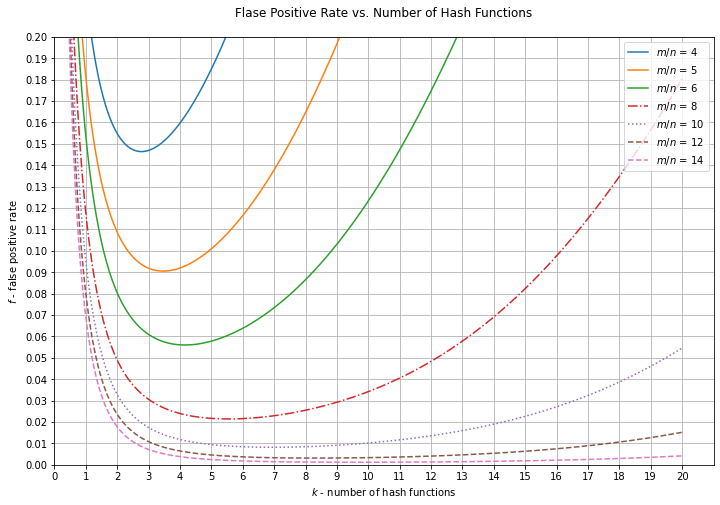

In [7]:
# Set "m" and "n" as list of int elements (with same lenght) with random numbers to get proper m/n ratios.
m = [8, 10, 30, 80, 110, 60, 140]
n = [2, 2, 5, 10, 11, 5, 10]

# Set labels and linestyles for each m/n ratio as list of strings - should be same length as "m" and "n" lists.
labels = ['$m/n$ = 4', '$m/n$ = 5', '$m/n$ = 6', '$m/n$ = 8', '$m/n$ = 10', '$m/n$ = 12', '$m/n$ = 14']
linestyles = ['solid', 'solid', 'solid', 'dashdot', 'dotted', 'dashed', 'dashed', 'dashed']

# Plot the data
plot_fp_rate_vs_num_hash_functions(m, n, labels, linestyles)

<p align='justify'>The plot relating the number of hash functions $(k)$ and the false positive rate $(f)$ in a Bloom filter. The graph shows the false positive rate for a fixed bits-per-element ratio $(m/n)$, different curves corresponding to different ratios. Starting from the top to bottom, we have $m/n=4, 5, 6, 8, 10, 12, 14$. As the amount of allowed space per element increases (going from top to bottom), given the same number of hash functions, the false positive rate drops. Also, the curves show the trend that increasing $k$ up until some point (going from left to right), for a fixed $m/n$, reduces the error, but after some point, increasing $k$ increases the error rate. Note that the curves are fairly smooth, and for example, when $m/n$=8, i.e., we are willing to spend 1 byte per element, if we use anywhere between 4 and 8 hash functions, the false positive rate will not go above 3%, even though the optimal choice of $k$ is between 5 and 6.

While increasing $m$ or reducing $n$ drops the false positive rate, i.e., more bits per element results in the overall lower false positive curve, the graph also shows the two-fold effect that $k$ has on false positives: up to a certain point, increasing $k$ helps reduce false positives, but there is a point at which it starts to worsen it; this is because having more hash functions allows a lookup more chance to find a zero, but also on an insert, sets more bits to 1. The minimum for each curve is the sweet spot that is the optimal $k$ for a particular bits-per-element. This leads to formula for optimum number of hash functions:
$${\displaystyle k={\frac {m}{n}}\ln 2}$$

For example, when $m/n=8$, $k_{opt} = 5.545$. We can use this formula to optimally configure the Bloom filter. Keep in mind that these calculations assume $k$ is a real number, but our $k$ has to be an integer. So if $k_{opt}$ is 5.546 when $m/n=8$ a non-integer, then we need to choose one of the two neighboring integers, which means that false positive rate also is not an exact anymore. Often it is better to choose the smaller of the two possible values of $k$, because it reduces the amount of computation we need to do. So in that case we can conclude that $k=5$ is the optimal number of hash functions.

Let's try a little bit different implementation of Bloom filter for spell checking<sup>13</sup>.</p>

In [8]:
class BloomFilterSpell:

    def __init__(self, size, hash_count):
        self.size = size
        self.hash_count = hash_count
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)

    def add(self, string):
        for seed in range(self.hash_count):
            result = mmh3.hash(string, seed) % self.size
            self.bit_array[result] = 1

    def lookup(self, string):
        for seed in range(self.hash_count):
            result = mmh3.hash(string, seed) % self.size
            if self.bit_array[result] == 0:
                return "Definitely not"
        return "Probably"

In [9]:
def fp_prob(num_hash_funcs, num_items, bit_vec_length):
    probability_of_success = np.e**(
        (-num_hash_funcs * float(num_items)) / bit_vec_length)
    return (1.0 - probability_of_success)**num_hash_funcs

def random_char(y):
    return ''.join(random.choice(string.ascii_letters) for x in range(y))

size = 1024000
hash_functions = 5

bloomfil = BloomFilterSpell(size, hash_functions)

lines = open("data/words_alpha.txt").read().splitlines()

for line in lines:
    bloomfil.add(line)
#result = raw_input("Which word you want to search: ")
prob_fp = fp_prob(hash_functions, len(lines), size)
print(f"Probability of False Positives: {prob_fp}")

random_word = random_char(10)
print (f"Randomly generated word is {random_word}")
print (f"{random_word} Spelling is {bloomfil.lookup(random_word)} correct")
# print "{} Spelling is {} correct".format(result,bloomfil.lookup(result))

Probability of False Positives: 0.408050357119402
Randomly generated word is eJPSDLJXJI
eJPSDLJXJI Spelling is Definitely not correct


<h2>Bloom filter vs. other data structures<sup>14, 15</sup></h2>

<p align='justify'>Now after we show and describe what the Bloom filter is, let's compare this probabilistic data structure with other data structures.</p>

<h4>BF vs. HashTable</h4>

<img src='images/hash_table.png' alt="Hash Table Data Structure" height=300 width=500 align='left'/>
<p align='justify'>Hashtable is designed to use a special function called the Hash function which is used to map a given value with a particular key for faster access of elements. It is used where fast lookups are required.(Under reasonable assumptions, average time for element lookup in a hash table is $O(1)$). Dictionary in Python is implemented using HashTables. Java also implements HashTable class. Some applications of hashing can be found <a href='https://www.geeksforgeeks.org/applications-of-hashing/'>here.</a>

HashTables and bloom filters are closely related to each other, therefore, it is wise to compare these two data structures and use them wisely as per your application/need demands.

<table>
    <tr>
        <th style='text-align: center;'>Hash Table</th>
        <th style='text-align: center;'>Bloom filter</th>
    </tr>
    <tr>
        <td style='text-align: justify;'>In hash table the object gets stored to the bucket (index position in the hashtable) the hash function maps to.</td>
        <td style='text-align: justify;'>Bloom filters doesn’t store the associated object. It just tells whether it is there in the bloom filter or not.</td>
    </tr>
    <tr>
        <td style='text-align: justify;'>Hash tables are less space efficient. All (note: most) of the strings must map to a certain location.</td>
        <td style='text-align: justify;'>Bloom filters are more space efficient. It’s size is even the less than the associated object which it is mapping - just an array of 0 and 1s according to the hash functions in the bloom.</td>
    </tr>
    <tr>
        <td style='text-align: justify;'>Supports deletions - they can just mark that location of the object as NULL again.</td>
        <td style='text-align: justify;'>It is not possible to delete elements from bloom filters. We have to reset a bloom filter entirely to restart.</td>
    </tr>
    <tr>
        <td style='text-align: justify;'>Hashtables give accurate results.</td>
        <td style='text-align: justify;'>Bloom filters have small false positive probability. (False positive means it might be in bloom filter but actually it is not.)</td>
    </tr>
    <tr>
        <td style='text-align: justify;'>In a hashtable either we should implement multiple hash functions or have a strong hash function to minimize collisions.</td>
        <td style='text-align: justify;'>A bloom filter uses many hash functions. There is no need to handle collisions.</td>
    </tr>
    <tr>
        <td style='text-align: justify;'>Hashtables (hashmaps) are used in compiler operations, programming languages (hash table based data structures), password verification, etc.</td>
        <td style='text-align: justify;'>Bloom filters find application in network routers, web browsers (to detect the malicious urls), in password checkers (to not a set a weak or guessable or list of forbidden passwords), existing username checkers etc.</td>
    </tr>
</table>

Let's compare with one simple <a href='https://softwareengineering.stackexchange.com/questions/252341/are-bloom-filters-actually-faster-than-hashes-even-taking-in-account-cache'>example</a>:

Consider a simplified hash function $f(x) = x \% 2$. Now you input the following integers: 2, 3, 4, 5, 6, 7.

Standard Hash: the given values will be hashed, and we end up with a lot of collisions due to $f(2) = f(4) = f(6) = 0$ and $f(3) = f(5) = f(7) = 1$. Nevertheless, the hash stores all of these values and it will be able to tell you that 8 is not stored in it. How does it do that? It keeps track of collisions and stores all values with the same hash-value, then when you query it, it additionally compares your query. So let's query the map for 8: $f(8) = 0$, so it'll look into a bucket where we have already inserted 2, 4, 6 and needs to make 3 comparisons in order to tell you that 8 was not part of the input.

Bloom filter: Normally, each input value is hashed against $k$ different hash functions. Again, for simplicity, let's just assume we only use the single hash function $f$. We need an array of 2 values then and when we encounter the input 2 it means that due to $f(2) = 0$ we set the array value at position 0 to the value 1. The same happens for 4 and 6. Similarly, the inputs 3, 5, 7 each set the array position 1 to value 1. Now we query if 8 was part of the input: $f(8) = 0$ and the array at position 0 is 1, so the bloom filter will falsely claim that 8 was indeed part of the input.

To get a bit more realistic, let's consider that we add a second hash function $g(x) = x \% 10$. With that, the input value 2 leads to two hash values $f(2) = 0$ and $g(2) = 2$ and the two corresponding array positions will be set to 1. Of course, the array now should be at least of size 10. But when we query for 8 we will check the array at position 8 due to $g(8) = 8$, and that position will still be 0. That's why additional hash functions decrease the false positives you'll get.

Comparison: The bloom filter uses $k$ hash functions which means up to $k$ random array positions being accessed. But that figure is exact. The hash instead is only guaranteeing you an amortized constant access time, but may de-generate depending on the nature of your hash function and input data. So it is typically faster, except for the de-generated cases.
However, once you have a hash collision the standard hash will have to check equality of the stored values against the query value. This equality check may be arbitrarily expensive and will never occur with a bloom filter.
In terms of space, the bloom filter is constant, as there is never any need to use more memory than the designated array. On the other hand, the hash grows dynamically and may get much larger due to having to keep track of collisioned values.
</p>

<h4>Comparing vs. Tries and BSTs</h4>

<p align='justify'>Let's first define trie and BST.<br>

<img src='images/trie.png' alt="Trie Data Structure" width=200 height=150 align='left'/>
<b><i>A trie</i></b>, also called digital tree or prefix tree, is a type of search tree, a tree data structure used for locating specific keys from within a set. These keys are most often strings, with links between nodes defined not by the entire key, but by individual characters. In order to access a key (to recover its value, change it, or remove it), the trie is traversed depth-first, following the links between nodes, which represent each character in the key. More about tries you can read <a href='https://en.wikipedia.org/wiki/Trie'>here</a>.</p>
    
<p align='justify'>
<img src='images/binary_search_tree.png' alt="Binary Search Tree Data Structure" height=250 width=200 align='right'/>
<b><i>A binary search tree (BST)</i></b>, also called an ordered or sorted binary tree, is a rooted binary tree whose internal nodes each store a key greater than all the keys in the node's left subtree and less than those in its right subtree. A binary tree is a type of data structure for storing data such as numbers in an organized way. Binary search trees allow binary search for fast lookup, addition and removal of data items, and can be used to implement dynamic sets and lookup tables. The order of nodes in a BST means that each comparison skips about half of the remaining tree, so the whole lookup takes time proportional to the binary logarithm of the number of items stored in the tree. This is much better than the linear time required to find items by key in an (unsorted) array, but slower than the corresponding operations on hash tables. Several variants of the binary search tree have been studied. More about binary search trees you can read <a href='https://en.wikipedia.org/wiki/Trie'>here</a>.
    
    
Now let's go to the comparison.
<ul>
    <li>Tries have the limitation of being useful only for strings. BSTs and Bloom filters can account for various other data types and miscellaneous structs.</li>
    <li>Complexity for Insertion and Search:
        <ul>
            <li>Tries: $O(string length)$</li>
            <li>BST: $O(string_length * height)$ [As the entire string is being stored at each node, we must compare the entire string $h$ number of times]</li>
            <li>Bloom: $O(1)$ or $O(hash function)$ if the hash functions are very complex</li>
        </ul></li>
    <li>Deletion: Cannot occur in bloom filters but can in the other two</li>
    <li>Space complexity:
        <ul>
            <li>Tries are better than BST as they do not store overlapping prefixes again and again.</li>
            <li>Bloom filters work with hash functions so they are obviously the best of the lot.</li>
        </ul>
    </li>
    <li>Tries and BSTs can store the entire string but the Bloom Filter can only tell the presence / absence of it, not recover it (limitation).</li>
</ul>

The most significant advantage of Bloom filters over other data structures such as self-balancing trees, tries, HashMaps is in terms of space utilization. Any data structure implemented in order to store a set of elements (ordered or unordered) stores each element in its entirety. The storage requirement in this case can range from a few bits to several bytes. Furthermore, there are overhead costs associated with certain data structures. For eg: linked lists require additional linear space overhead for pointers. As mentioned earlier, the only caveat with Bloom filters is the possibility of a false positive. However with a relatively small error rate (choosing the optimal value for $k$), Bloom filters on an average require around 9.6 bits per element irrespective of the size of the elements. This is owed to its compact structure and nature of the approximation data structure. Therefore, if an error rate of $≤ 2\%$ is acceptable, and a few false postives are not harmful to the result, bloom filters are ideal. Lastly, in order to avoid expensive search operation over disk or network by checking probabilistically beforehand if the element possibly exists, bloom filter is the way to go!</p>

<h2>Conclusions</h2>

<p align='justify'>Bloom filter packs the space really well but are there, or are there better data structures? In other words, for the same amount of space, can we achieve a better false positive rate than the Bloom filter? To answer this question, we need to derive a lower bound that relates the space in the Bloom filter $(m)$ with the false positive rate $(f)$. This lower bound (available in some more theoretical resources on the subject) tells us that the amount of space the Bloom filter uses is $1.44x$ away from the minimum. There are, in fact, data structures that are closer to this lower bound than Bloom filter, but some of them are very complex to understand and implement.

The basic Bloom filter data structure leaves a lot to be desired, and computer scientists have developed various modified versions of Bloom filters that address its various inefficiencies. For example, the standard Bloom filter does not handle deletions. There is a version of Bloom filter called counting Bloom filter that uses counters instead of individual bits in the cells. The insert operation in the counting Bloom filter increments the respective counters, and the delete operation decrements the corresponding counters. Counting Bloom filters use more space and can also lead to false negatives, when, for example, we repeatedly delete the same element thereby bringing down some other element counters to zero.

Another issue with Bloom filters is their inability to be efficiently scaled. One of the problems with scaling in the way we are used to with hash tables, by rehashing and re-inserting, is that we do not store the items nor the fingerprints in the Bloom filter, so the original keys are effectively lost and rehashing is not an option.

Also, Bloom filters are vulnerable when the queries are not drawn uniformly and randomly. Queries in real-life scenarios are rarely uniform random. Instead, many queries follow the Zipfian distribution, where a small number of elements is queried a large number of times, and a large number of elements is queried only once or twice. This pattern of queries can increase our effective false positive rate, if one of our “hot” elements, i.e., the elements queried often, results in the false positive. A modification to the Bloom filter called weighted Bloom filter addresses this issue by devoting more hashes to the “hot” elements, thus reducing the chance of the false positive on those elements. There are also new adaptations of Bloom filters that are adaptive, i.e. upon the discovery of a false positive, they attempt to correct it.

The other vein of research has been focused on designing data structures functionally similar to the Bloom filter, but their design has been based on particular types of compact hash tables. Quotient filters are a viable alternative to Bloom filters, but they deserve to be represented separately.</p>

<h4>Summary</h4>

<p align='justify'>
    <ol>
        <li>Bloom filters have been widely applied in the context of distributed databases, networks, bioinformatics, and other domains where regular hash tables are too space-consuming.</li>
        <li>Bloom filters trade accuracy for the savings in space, and there is a relationship between the space, false positive rate, the number of elements and the number of hash functions in the Bloom filter.</li>
        <li>Bloom filters do not meet the space vs. accuracy lower bound, but they are simpler to implement than more space-efficient alternatives, and have been adapted over time to deal with deletes, different query distributions, etc.</li>
        <li>Quotient filters are based on compact hash tables and are functionally equivalent to Bloom filters, with the benefit of the cache-efficient operations, and ability to delete, merge and resize.</li>
        <li>Cuckoo filters are based on cuckoo hash tables, and promise the lookup of $O(1)$. Just like quotient filters, they store fingerprints instead of the actual keys.</li>
        <li>Time Complexity : Adding a new element and testing for membership are both Constant Time - $O(1)$ operations</li>
        <li>Space Complexity: A bloom filter with room for $n$ elements requires $O(n)$ space.</li>
    </ol>
</p>

<h2>References</h2>

<ol>
    <li><a href='https://en.wikipedia.org/wiki/Data_structure'>Data Structure Wiki</a></li>
    <li><a href='https://www.geeksforgeeks.org/data-structures/'>Data Structure GeeksforGeeks</a></li>
    <li><a href='https://en.wikipedia.org/wiki/List_of_data_structures#Abstract_data_types'>List of Data Structures Wiki</a></li>
    <li><a href='https://introprogramming.info/intro-csharp-book/read-online/glava19-strukturi-ot-danni-supostavka-i-preporuki/'>Svetlin Nakov CSharp Book</a></li>
    <li><a href='https://pdsa.gakhov.com/'>Andrii Gakhov - Probabilistic Data Structures and Algorithms for Big Data Applications</a></li>
    <li><a href='https://dzone.com/articles/introduction-probabilistic-0'>DZone Probabilistic Data Structures</a></li>
    <li><a href='https://iq.opengenus.org/probabilistic-data-structures/'>Opengenus PDS</a></li>
    <li><a href='https://stackoverflow.com/questions/27307169/what-are-probabilistic-data-structures'>StackOverflow PDS</a>
    <li><a href='https://en.wikipedia.org/wiki/Bloom_filter'>Bloom filter Wiki</a></li>
    <li><a href='https://freecontent.manning.com/all-about-bloom-filters/'>Freecontent Manning Bloom Filter</a></li>
    <li><a href='https://www.kdnuggets.com/2016/08/gentle-introduction-bloom-filter.html'>KDNuggets Bloom filters</a></li>
    <li><a href='https://python.land/bloom-filter'>Python Land Bloom Filter</a></li>
    <li><a href='https://github.com/solo-rey/Bloom-filter'>Solo Rey Github Bloom Filter Spell Check</a></li>
    <li><a href='https://www.geeksforgeeks.org/difference-between-bloom-filters-and-hashtable/'>GeeksforGeeks Bloom Filter Comparison</a></li>
    <li><a href='https://iq.opengenus.org/comparison-of-bloom-filter/'>Opengenus Bloom Filter Comparison</a></li>
</ol>